## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [6]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [7]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [9]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


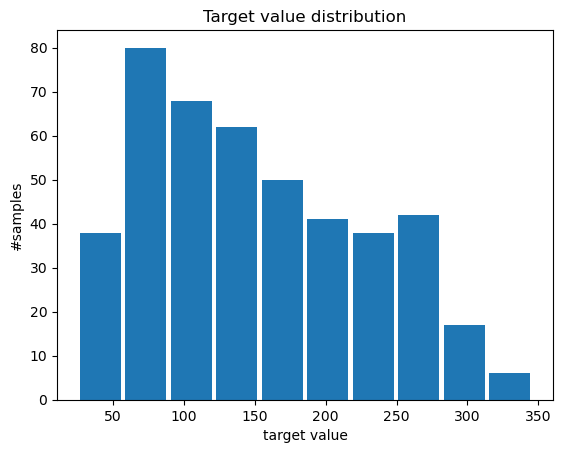

In [10]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [11]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [12]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [70]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
reg_score = np.round(reg_score,3)
reg_score


0.477

**Interpret model coefficients and intercept**

In [71]:
reg_coef = np.round(reg.coef_,3)
reg_coef

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [72]:
reg_int = np.round(reg.intercept_,3)
reg_int

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

y = 29.245 * x1 + -261.706 * x2 + 546.3 * x3 + 388.398 * x4 + -901.96 * x5 + 506.763 * x6 + 121.154 * x7 + 288.035 * x8 + 659.269 * x9 + 
41.377 * x10 + 151.008 

**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [29]:
# Using fit_interceppt = Fasle, the default was True
reg_new = LinearRegression(fit_intercept=False) 
reg_new.fit(X_train, y_train)
reg_score_new = reg_new.score(X_test, y_test)
np.round(reg_score_new,3)

-4.102

#### Using feature_names_in_ and n_feature_in_ attributes.

In [30]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

In [31]:
reg.n_features_in_

10

In [32]:
reg.coef_

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [73]:
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
rg_score = np.round(rg_reg_score,3)
rg_score

0.423

In [74]:
rg_coef = np.round(rg_reg.coef_,3)
rg_coef

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [75]:
rg_int = np.round(rg_reg.intercept_,3)
rg_int

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [37]:
# Fit model
la_reg = Lasso()
la_reg.fit(X_train, y_train)

Lasso()

In [49]:
# Evaluate model performance
la_reg_score = la_reg.score(X_test, y_test)
lasso_score = np.round(la_reg_score,3)
lasso_score

0.362

In [42]:
la_reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

In [53]:
# Interpret model coefficients and intercept
lasso_coef = np.round(la_reg.coef_,3)
lasso_coef

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

In [46]:
lasso_int = np.round(la_reg.intercept_,3)
lasso_int

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [20]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to: 
# - round to 3 digits after the decimal point
# - rename the column names 
# - include intercept and score in the last two rows


,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


#### My dataframe coding starts here:

In [79]:
# Creating Lasso data frame
lasso_data = {'lasso': lasso_coef}
lasso_df = pd.DataFrame(lasso_data, index=la_reg.feature_names_in_)
lasso_df.loc['intercept'] = lasso_int
lasso_df.loc['score'] = lasso_score
lasso_df
# Creating ridge data frame
rg_data = {'ridge': rg_coef}
rg_df = pd.DataFrame(rg_data, index=la_reg.feature_names_in_)
rg_df.loc['intercept'] = rg_int
rg_df.loc['score'] = rg_score
rg_df
# Creating linear data frame
reg_data = {'linear': reg_coef}
reg_df = pd.DataFrame(reg_data, index=la_reg.feature_names_in_)
reg_df.loc['intercept'] = reg_int
reg_df.loc['score'] = reg_score
reg_df
# Combining the data frames
combined_df = pd.concat([reg_df, rg_df, lasso_df], axis=1)
combined_df


,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

1. The first observation that we can draw is on average, the weight of each feature is lowered in ridge and lasso, except for age and s6 in ridge. 
    - The original linear model contains many large coeffient, while this might be accurate in predicting the original traning data, but it is very prone to overfitting the original data. The small changes will lead to a significant change and it capture noise. Thus we use ridge and lasso to make our model to be more robust to noise and prevent overfitting. This is why we see a decrease in the weight of the features. 
    - The ridge and lasso regularzation also serving as a balance to reduce the model complexity (i.e. large coeffienct) while maintaining the performance. In this case, we see the score dropped for ridge and lasso because it reduces the coef of the features, but at a cost of the model performance. This is uncommon, for most of the case, ridge and lasso should do a better job on both maintaining the performance while reduce the compleixity. I assume, if the original linear model is well regularized, then applying l1 or l2 could be potentially harmful? 
2. As we can observe from ridge and lasso, the lasso tends to punish the features that are not important to become 0. In this case, 7 features were transformed into 0s, and it only selected 3 important features. This leads to a sparse representation. Where only a subset of features are selected. In the case of ridge, we see ridge places more punishment on the large weights, it makes them very close to 0 but often not become 0 because it used sqaured. In this case, unlike the 3 features selected by lasso, the ridge contained all of the features, it just that some features are close to 0 such as s1 = -2.229. 

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Fit a polynomail regression model with degree=2

In [83]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [84]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

I guess the reason why we do fit_transform on traning and only transform on testing data is we are only fitting on the original model, and we use the fitted and transformed parameters to predict the testing. We should avoid fitting the testing data. 

In [99]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
poly2_score = np.round(poly2_score,3)
poly2_score 

0.413

Get intercept

In [96]:
degree2_int = np.round(poly2_reg.intercept_,3)
degree2_int

-360.919

### Your task: fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

Transforming the training parameters into degree of 1

In [88]:
poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train)
X_train_poly1.shape

(309, 11)

Transforming the testing into poly

In [89]:


X_test_poly1 = poly1.transform(X_test)
X_test_poly1.shape

(133, 11)

Fit and check the performance

In [100]:

poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)
poly1_score = poly1_reg.score(X_test_poly1, y_test)
poly1_score = np.round(poly1_score,3)
poly1_score 

0.477

get intercept

In [97]:
degree1_int = np.round(poly1_reg.intercept_,3)
degree1_int

151.008

### Your task: fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

Transforming the training parameters into degree of 3

In [92]:
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)
X_train_poly3.shape

(309, 286)

Transforming the testing into poly

In [93]:
X_test_poly3 = poly3.transform(X_test)
X_test_poly3.shape

(133, 286)

Fit and check the performance

In [101]:

poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly3, y_train)
poly3_score = poly3_reg.score(X_test_poly3, y_test)
poly3_score = np.round(poly3_score,3)
poly3_score

-92.583

get intercept

In [98]:
degree3_int = np.round(poly3_reg.intercept_,3)
degree3_int

2.371636934848117e+16

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [116]:
# Creating linear data frame
linear_data = {
    'linear': [degree1_int, poly1_score],
}
linear_df = pd.DataFrame(linear_data, index=['intercept', 'score'])
linear_df

# Creating poly1 data frame
poly1_data = {
    'poly_d1': [degree1_int, poly1_score],
}
poly1_df = pd.DataFrame(poly1_data, index=['intercept', 'score'])
poly1_df

# Creating poly2 data frame
poly2_data = {
    'poly_d2': [degree2_int, poly2_score],
}
poly2_df = pd.DataFrame(poly2_data, index=['intercept', 'score'])
poly2_df

# Creating poly 3 data frame
poly3_data = {
    'poly_d3': [degree3_int, poly3_score],
}
poly3_df = pd.DataFrame(poly3_data, index=['intercept', 'score'])
poly3_df

combined_poly = pd.concat([linear_df, poly1_df, poly2_df, poly3_df], axis=1)
combined_poly



,linear,poly_d1,poly_d2,poly_d3
intercept,151.008,151.008,-360.919,2.371637e+16
score,0.477,0.477,0.413,-9.258300e+01


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

1. The poly serves as transforming the original matrix into a poly combination matrix. We use the poly when the original linear model is too simple to predict the relationship, which the original linear regression is just a line, could prone to underfitting the data. 
2. Here we use the poly function. When the degree = 1, we see the result intercect and score are the same with linear, this is because the degree = 1 (power = 1) is the same with linear regression. 
3. When we increase the degree, we are essentially making the line to be curve, making it to be more "flexible" to predict the complex relationship, however, we need to be cautious, when we increase the degree, it is highly likely to make it to be prone to "overfitting".
4. degree = 2 shows that we used a poly degree = 2 matrix linear regression to predict the relationship, and the performance actually decreases. 
    - I think this suggests that degree = 2 is overfitting the data, where a linear regression is already relatively well in predicting the relationship, making it to be higher power may potentially make the model to capture the noise within the data, while the linear regression used the average, could potentailly to some extend to eliminate those noise. 
5. When we use degree = 3, we see the performance is significantly lower than poly = 2 and linear function. This suggests that a poly = 3 is overfitting the data. And it becomes so complex and started to capture so much noise within the data. I think these models suggest that a linear model is a better fit for this dataset. 
6. When we use poly matrix linear regression, we could use L1 and L2 to reduce the issue of overfitting. 

### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective? 

In [117]:
combined_df

,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


Based on the weight table from earlier, it is easily to observe that:
1. Age positively contribute to diabetes, suggested by linear and ridge. 
    - This is because as we age, our body immune system resistance to insulin decreased. And our overall resistance to disease decrease. 
2. Sex is negatively contribute to diabetes as suggested by linear and ridge. 
    - Studies have suggest that the difference in hormones such as testostgen and estrogen could affect metabolism. Thus difference in these hormone levels in males and females could affect glucose metabolism, making one sex more prone to diabetes.
3. BMI is positively related with diabetes. 
    - BMI is often asscoiated with obesity, and studies have suggest that higher obesity is related to a decrease repond to insulin, less resisance to insulin is more prone to diabetes. 
4. Blood pressure is positively related with diabetes. 
    - Studies have suggest that high blood pressure is often co-exist with diabetes. Diabetes introduces less insulin resistance, can often impair the blood vessels, making the blood pressure abnormal.
5. S1 (total serum cholesterol) is negatively related with diabetes. 
    - higher serum cholesterol is often relate to Dyslipidemia, and Dyslipidemia is often a crucial factor that lead to diabetes. 
6. S2 (low-density lipoproteins) is positively related with diabetes. 
    - This is often refer to the bad choleterol, High level of low-density lipoproteins is also link to Dyslipidemia, a key factor that lead to diabetes.
7. S3 (high-density lipoproteins), according to ridge, is negatively related with diabetes. 
    - This makes sense because high-density lipoproteins is associate with improved insulin resistance, thus more resistant to diabetes. 
8. S4 (total cholesterol / HDL) is positively related to diabetes. 
    - The ratio is often provide a more comprehensive detail on the relationship of choleterol with high desnity choleterol, as choleterol is a key factor relate to insulin resistance, it makes more sense that it is positively relate to diabetes. 
9. S5 (possibly log of serum triglycerides level) is positively related to diabetes. 
    - elevated level of triglycerides level can make the cells to be less reponsive to insulin, thus making the body more prone to diabetes. 
10. S6 (blood sugar level) is positively related to diabetes. 
    - The abnormal blood sugar could indicate that there is a disruption of metabolism of sugar within the body, and this is commonly shown in diabetes patients. 
### BMI, BP, S5(possibly log of serum triglycerides level)
- These 3 features seems to positvely contribute to diabetes the most. 
### Sex, S3 (high-density lipoproteins),S1 (total serum cholesterol)
- These 3 features seems to negatively contribute to diabetes the most. 
### Age and S6 (Blood sugar)
- This 1 features seem to contribute to diabetes the least. 

## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [118]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [119]:
# please change to your file path
df_data = pickle.load(open('./banknote_authentication_dataframe.pickle','rb'))

### Basic dataset exploration

In [120]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [121]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [123]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [125]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((960, 4), (412, 4))

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [126]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [127]:
clf.score(X_test, y_test)

0.9878640776699029

In [128]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [129]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

I am going to set the pentality = 'l2' and C = 0.01.

In [137]:
# Set parameters and fit
clf_new = LogisticRegression(random_state=0, solver='liblinear', penalty='l2', C=0.01).fit(X_train, y_train)

# Check performance
clf_new.score(X_test, y_test)

0.9733009708737864

In [149]:
min(clf_new.coef_[0])
max(clf_new.coef_[0])
np.mean(np.abs(clf_new.coef_))
num_zero_coefficients = np.sum(clf_new.coef_ == 0)
num_zero_coefficients


0

### Compare model performance with different c values and different penalties

In [43]:
def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
     
    # set the model parameter c to different values and train the model 
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance 
    #    get the statistical information about the model coefficients: 
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero 
    
    ### Your code starts from here 
    
    

In [174]:
def compare_c(X_train, y_train, X_test, y_test, p):
    results = []
    for c in [0.001, 0.01, 0.1, 1, 10, 100,1000,10000]:
        clf_new = LogisticRegression(random_state=0, solver='liblinear', penalty=p, C=c)
        clf_new.fit(X_train, y_train)
        min_coef = np.min(clf_new.coef_[0])
        max_coef = np.max(clf_new.coef_[0])
        mean_abs_coef = np.mean(np.abs(clf_new.coef_))
        num_zero_coefficients = np.sum(clf_new.coef_ == 0)
        test_score = clf_new.score(X_test, y_test)
        results.append({
            'c': c,
            'min': min_coef,
            'max': max_coef,
            'mean_abs': mean_abs_coef,
            'n_zero': num_zero_coefficients,
            'test_score': test_score
        })
    results_df = pd.DataFrame(results)
    pd.set_option('display.precision',3)
    return results_df
compare_c(X_train, y_train, X_test, y_test, p='l2')
    
        

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.357,-0.074,0.190,0,0.922
1,0.010,-0.861,-0.173,0.485,0,0.973
2,0.100,-1.581,-0.163,0.915,0,0.988
3,1.000,-2.835,-0.166,1.645,0,0.988
4,10.000,-5.171,-0.290,2.937,0,0.988
5,100.000,-7.648,-0.438,4.297,0,0.990
6,1000.000,-8.425,-0.482,4.724,0,0.990
7,10000.000,-8.525,-0.488,4.779,0,0.990


In [173]:
compare_c(X_train, y_train, X_test, y_test, p='l1')

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.042,0.000,0.010,3,0.624
1,0.010,-0.807,0.000,0.328,1,0.917
2,0.100,-1.749,0.000,0.935,1,0.988
3,1.000,-3.852,-0.133,2.172,0,0.988
4,10.000,-7.081,-0.387,3.977,0,0.990
5,100.000,-8.179,-0.463,4.586,0,0.990


**Your thoughts and observations:** 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

1. In this case, a smaller c means more pentality on the complexity and less on the loss. A small C tends to lead to underfitting the data, as we can examine in the table, when we decrease the c to 0.001, the test_score dropped substantially. Meanwhile, if we increase the c, that means we are decreasing the emphasize on regularization, but more emphasis on loss. While we do not examine the effect of overfitting effect in our model, it is highly likely to find the overfitting effect later on because when we increase the value of C, we are not punishing its large weight for potentially overifiting the data, leading our model more prone to noise. 
2. As we compare the two tables from l1 and l2, we see that ridge does not punish features coef to 0. As shown in table 1, we observe that the max is nearly close to 0 but never reach to 0, as indicated by n_zero, none of the coef were turned into 0s. Whereas in lasso (l1), we seen that when c = 0.001 (large penlty), we seen that 3 features were punished into 0s. Also in l1, when c = 0.01 and 0.1, there both contained features turned into 0 as indicated by n_zero. 
    - In this data, since we only had 4 features, when we turned 3 features into 0s, we are soley rely on a single feature, that makes our prediction highly inaccurate. 
    - In addition, we do not see much difference in the performance for both regularization when c > 0.01, but when c = 0.001 we see that lasso turned 3 features into 0, but the performance dropped to 0.624. This means that we did not find a good balance, lasso turned 3 features into 0s at a cost of our performance. Whereas in ridge, we seen that the performance also dropped, but maintained at 0.922, since it punish the large weights. When we set c to be smaller, lasso tends to kill off the features that are useless since we placed a strong emphasis on regularization, this is likely to filter a lot of features. 
    - We see that lasso serve as a filter, where it filters the useless features whereas ridge punish the large weight features. These two can both be useful depends on our data. 
3. The smaller the c, the less the mean_abs. This is because when we decrease c, we are placing more emphasis on regularization, that means the overall coef will decerase. The higher the c, the more room we allow for coef, thus the higher mean_abs or overall coef we get. This pattern can also be obversed from min and max, where we see both values in both columns are decerasing as c becomes smaller. 

In [175]:
clf_new.feature_names_in_


array(['variance', 'skewness', 'curtosis', 'entropy'], dtype=object)

In [177]:
clf_new.coef_

array([[-0.86081473, -0.4563506 , -0.45113637, -0.17266226]])

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?